In [1]:
import numpy as np
import cv2

In [2]:
img = cv2.imread('italy2018.jpg')

In [3]:
img[0]

array([[38, 43, 11],
       [37, 42, 10],
       [36, 41,  9],
       ..., 
       [24, 37, 15],
       [22, 36, 12],
       [23, 36, 12]], dtype=uint8)

In [4]:
cv2.imshow('Image', img)
cv2.waitKey(0)

-1

In [5]:
cv2.imshow('Image', img) 
cv2.waitKey(2000)
cv2.destroyWindow('Image')



In [6]:
b,r,g = cv2.split(img)

In [7]:
img2 = cv2.merge((b,g,r))

In [8]:
cv2.imshow('Image2', img2) 
cv2.waitKey(0)
cv2.destroyAllWindows()


In [9]:
cv2.imwrite('italy2018altered.png', img2) 

True

In [10]:
img2 = cv2.imread('soccer.jpg')
cv2.imshow('Image2', img2) 
cv2.waitKey(0)

-1

In [11]:
img3 = cv2.add(img,img2)
cv2.imshow('Sum',img3)
cv2.waitKey(0)


-1

In [13]:
img3 = cv2.subtract(img, img2)
cv2.imshow('Sub1',img3)
cv2.waitKey(0)

-1

In [15]:
img3 = cv2.subtract(img2, img)
cv2.imshow('Sub1',img3)
cv2.waitKey(0)

-1

In [16]:
img3 = img + img2
cv2.imshow('numpy',img3)
cv2.waitKey(0)

-1

In [23]:
img3 = cv2.addWeighted(img, 0.3, img2, 0.7, 0)
cv2.imshow('numpy',img3)
cv2.waitKey(0)

-1

# The edge Detection

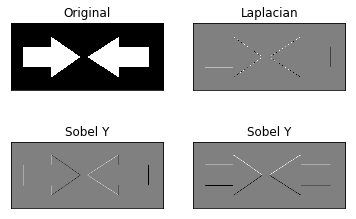

In [25]:
from matplotlib import pyplot as plt
 
img = cv2.imread('blackandwhite.jpg',0)
 
laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
 
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
 
plt.show()


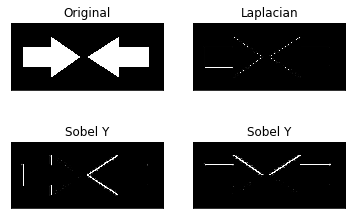

In [26]:
laplacian = cv2.Laplacian(img, cv2.CV_8U)
sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
 
plt.show()

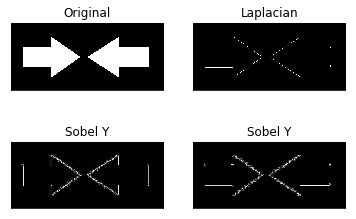

In [27]:
laplacian64 = cv2.Laplacian(img, cv2.CV_64F)
sobelx64 = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely64 = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
 
laplacian = np.uint8(np.absolute(laplacian64))
sobelx = np.uint8(np.absolute(sobelx64))
sobely = np.uint8(np.absolute(sobely64))

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
 
plt.show()

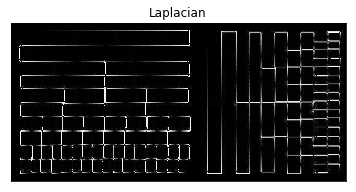

In [29]:
from matplotlib import pyplot as plt
 
img = cv2.imread('gradients.jpg',0)
 
laplacian = cv2.Laplacian(img, cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

laplacian64 = cv2.Laplacian(img, cv2.CV_64F)
sobelx64 = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely64 = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
 
laplacian = np.uint8(np.absolute(laplacian64))
sobelx = np.uint8(np.absolute(sobelx64))
sobely = np.uint8(np.absolute(sobely64))

plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
 
plt.show()

# Face Recognition  

In [30]:
net = cv2.dnn.readNetFromCaffe('deploy.prototxt.txt', 'res10_300x300_ssd_iter_140000.caffemodel')
 
image = cv2.imread('italy2018.jpg')
(h, w) = image.shape[:2]

blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

In [31]:
net.setInput(blob)
detections = net.forward()

In [32]:
confidence_threshold = 0.5

for i in range(0, detections.shape[2]):

    confidence = detections[0, 0, i, 2]
 
    if confidence > confidence_threshold:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
 
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY),(0, 0, 255), 2)
        cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
 
cv2.imshow("Output", image)
cv2.waitKey(0)

-1